## Exploring the Refugee Crisis & Investigating Political Institutions and Growth

In this study, we will explore the refugee crisis in the Mediterranean.

The United Nations Refugee Agency, a.k.a. the United Nations High Commissioner for Refugees (UNHCR) maintains a data portal with details on refugee movements around the world. The data from the portal is available through an API that permits various operations.

### Part 1

We will create a table with the most common nationalities of Mediterranean sea arrivals similar to the table featured in the UNHCR web site.

For this task we will use the JSON links provided at the UNHCR web site next to the table.

In [1]:
import pandas as pd
import requests
import numpy as np
from prettytable import PrettyTable
from datetime import date

In [2]:
url = 'https://data2.unhcr.org/api/population/get/origin?widget_id=36777&sv_id=11&population_collection=28&limit=10&fromDate=2017-01-01'

response = requests.get(url)

In [3]:
data = pd.DataFrame(response.json()['data'])
data.head()

,admin_level,centroid_lat,centroid_lon,children_total,date,female_04,female_1217,female_1859,female_511,female_60,...,pop_frequency_name,pop_origin_code,pop_origin_name,pop_type_code,pop_type_name,population_group_id,population_groups,source,uac_total,year
0,Continent,48.922499263758,12.3046875,0,2017-06-30,0,0,0,0,0,...,Monthly,NIG,Nigeria,RMG,Refugees/Migrants,4822,Refugees/Migrants from Nigeria,None,27,2017
1,Continent,48.922499263758,12.3046875,0,2017-06-30,0,0,0,0,0,...,Monthly,GUI,Guinea,RMG,Refugees/Migrants,5020,Refugees/Migrants from Guinea,None,0,2017
2,Continent,48.922499263758,12.3046875,0,2017-06-30,0,0,0,0,0,...,Monthly,ICO,Côte d'Ivoire,RMG,Refugees/Migrants,4810,Refugees/Migrants from Cote d'Ivoire,None,0,2017
3,Continent,48.922499263758,12.3046875,0,2017-06-30,0,0,0,0,0,...,Monthly,BGD,Bangladesh,RMG,Refugees/Migrants,4833,Refugees/Migrants from Bangladesh,None,176,2017
4,Continent,48.922499263758,12.3046875,0,2017-07-08,0,0,0,0,0,...,Monthly,SYR,Syrian Arab Rep.,RMG,Refugees/Migrants,4839,Refugees/Migrants from Syrian Arab Rep.,None,87,2017


We will keep only the 'useful' columns

In [4]:
table = data[['pop_origin_name','date','individuals']]
table.columns = ['Country of origin', 'Data date', 'Population']
table.head()

,Country of origin,Data date,Population
0,Nigeria,2017-06-30,14120
1,Guinea,2017-06-30,9193
2,Côte d'Ivoire,2017-06-30,8635
3,Bangladesh,2017-06-30,8241
4,Syrian Arab Rep.,2017-07-08,6039


In [5]:
table['Population'] = pd.to_numeric(table['Population'], errors='coerce').dropna()

/home/user/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Calculate the percentage of each country's population

In [7]:
total = table['Population'].sum()
table['Percentage'] = (table['Population'] / total) * 100

table.head()

/home/user/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country of origin,Data date,Population,Percentage
0,Nigeria,2017-06-30,14120,14.799908
1,Guinea,2017-06-30,9193,9.635662
2,Côte d'Ivoire,2017-06-30,8635,9.050793
3,Bangladesh,2017-06-30,8241,8.637822
4,Syrian Arab Rep.,2017-07-08,6039,6.329791


#### Most common nationalities of Mediterranean sea arrivals from January 2017 

In [8]:
x = PrettyTable()
x.field_names = ['Country of origin','Data date','Population','Percentage']
for i in range(table.shape[0]):
    x.add_row([x for x in table.iloc[i]])
print(x)

+------------------------+------------+------------+------------------+
|   Country of origin    | Data date  | Population |    Percentage    |
+------------------------+------------+------------+------------------+
|        Nigeria         | 2017-06-30 |   14120    |  14.7999077626   |
|         Guinea         | 2017-06-30 |    9193    |  9.63566232732   |
|     Côte d'Ivoire      | 2017-06-30 |    8635    |  9.05079345115   |
|       Bangladesh       | 2017-06-30 |    8241    |  8.63782152066   |
|    Syrian Arab Rep.    | 2017-07-08 |    6039    |  6.32979057921   |
|         Gambia         | 2017-06-30 |    5689    |  5.96293734147   |
|        Senegal         | 2017-06-30 |    4834    |  5.06676728927   |
|          Mali          | 2017-06-30 |    4825    |   5.0573339203   |
|        Morocco         | 2017-06-30 |    4712    |  4.93889273211   |
|        Eritrea         | 2017-06-30 |    4536    |  4.75441796113   |
|         Sudan          | 2017-06-30 |    3983    |   4.1747898

### Part 2

We will create a table and display a graph with the monthly arrivals from January 2014 to this day. The graph will be similar to the one featured in the UNHCR web site.

In [9]:
# fetch a list of the mediterranean countries
countries_url = 'http://data.unhcr.org/api/stats/mediterranean/countries.json'
response = requests.get(countries_url)
countries = response.json()

These are the mediterranean countries that received refugees, at least documented, from 2014 onwards

In [10]:
countries

[{'country_of_asylum': 'GRE', 'country_of_asylum_en': 'Greece'},
 {'country_of_asylum': 'ITA', 'country_of_asylum_en': 'Italy'},
 {'country_of_asylum': 'MTA', 'country_of_asylum_en': 'Malta'},
 {'country_of_asylum': 'SPA', 'country_of_asylum_en': 'Spain'}]

API provides the monthly arrivals by country for the Mediterranean countries. We will get the data for the current month (7/2017) for demonstration purposes 

In [11]:
url = 'http://data.unhcr.org/api/stats/mediterranean/monthly_arrivals_by_country.json?year=2017&month=7&country=GRE'
requests.get(url).json()

[{'country': 'GRE',
  'country_en': 'Greece',
  'country_latitude': 38.81,
  'country_longitude': 23.21,
  'country_total': 173450,
  'last_updated': 1483138800,
  'month': 7,
  'month_en': 'July',
  'value': 0,
  'year': 2017}]

As we can see, the data were updated at 12/30/2016 @ 11:00pm (UTC), based on the unix timestamp in the provided json **('last_updated': 1483138800)**. So there is no point in requesting information for 2017

In [12]:
# a list of monthly arrivals by country 

arrivals_url = 'http://data.unhcr.org/api/stats/mediterranean/monthly_arrivals_by_country.json'
res = requests.get(arrivals_url).json()

In [13]:
table = {}
# table dict will store aggregated information of population for each year
for i in res:
    if i['year'] != 2017:
        # values after 12/2016 will be 0, just ignore
        date = i['month_en'][0:3] + ' ' + str(i['year'])
        if date in table:
            table[date] += i['value']
        else:
            table[date] = i['value']

Let's sort the results by month/year from oldest to newest

In [15]:
ndf = pd.Series(table, index=table.keys())

In [16]:
x = PrettyTable()
x.field_names = ['Date of arrival','Total population']
for i in range(ndf.shape[0]):
    x.add_row([ndf.index[i], ndf.iloc[i]])
print(x)

+-----------------+------------------+
| Date of arrival | Total population |
+-----------------+------------------+
|     Jan 2014    |       3270       |
|     Feb 2014    |       4369       |
|     Mar 2014    |       7283       |
|     Apr 2014    |      17084       |
|     May 2014    |      16627       |
|     Jun 2014    |      26221       |
|     Jul 2014    |      28303       |
|     Aug 2014    |      33478       |
|     Sep 2014    |      33944       |
|     Oct 2014    |      23050       |
|     Nov 2014    |      13318       |
|     Dec 2014    |       9107       |
|     Jan 2015    |       5550       |
|     Feb 2015    |       7271       |
|     Mar 2015    |      10424       |
|     Apr 2015    |      29864       |
|     May 2015    |      39562       |
|     Jun 2015    |      54588       |
|     Jul 2015    |      78433       |
|     Aug 2015    |      130839      |
|     Sep 2015    |      163511      |
|     Oct 2015    |      221374      |
|     Nov 2015    |      

Time to plot the results. The following month labels will be visible at the graph:

In [17]:
ndf.keys()[[0,4,8,12,16,20,24,28,32,35]]

Index(['Jan 2014', 'May 2014', 'Sep 2014', 'Jan 2015', 'May 2015', 'Sep 2015',
       'Jan 2016', 'May 2016', 'Sep 2016', 'Dec 2016'],
      dtype='object')

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
plt.style.use('ggplot')
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

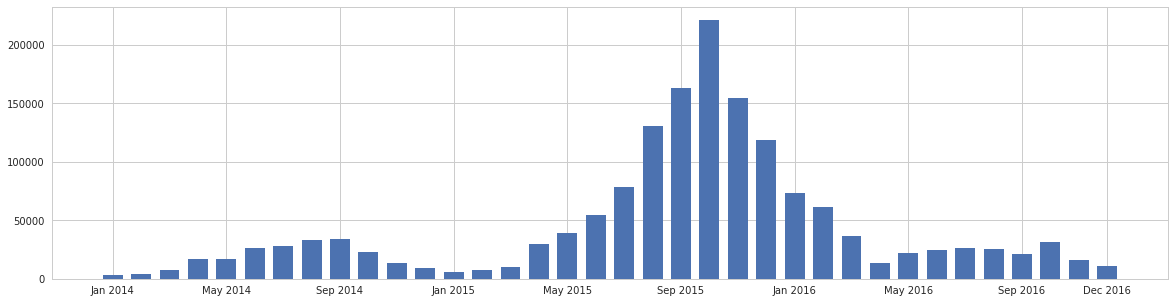

In [19]:
ticks = [0,4,8,12,16,20,24,28,32,35]

fig = plt.figure(figsize=(20,5))

width = 0.7
ind = np.arange(len(ndf))
plt.bar(ind, ndf, width=width)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.FixedLocator(ticks))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ndf.keys()[ticks]))

plt.show()

### Part 3

We will create a table showing the refugee arrivals per mediterranean country and location, per year and month, for all years for which data is available. In particular, the table will contain:

   - Countries
   - Years
   - Months
   - Locations
   - Number of arrivals

In [20]:
# a list of monthly arrivals by location 

arrivals_url = 'http://data.unhcr.org/api/stats/mediterranean/monthly_arrivals_by_location.json'

df3 = pd.DataFrame(columns=['country','location','year','month','arrivals'])
for col in ['year','month','arrivals']:
    df3[col] = df3[col].astype(int)
    
loc_total = {}
for country in countries:
    url = arrivals_url + '?country={}'.format(country['country_of_asylum'])
    res = requests.get(url)
    if res.json():
        # we got some data
        json = res.json()
        for i in json:
            # store all information
            s = pd.Series({'country' : i['country_en'],
                           'year'    : i['year'],
                           'month'   : i['month'],
                           'location': i['location'],
                           'arrivals': i['value']})
            df3 = df3.append(s, ignore_index=True)
            # store location total
            loc = i['country_en'] + '_' + i['location']
            loc_total[loc] = i['location_total']
    else:
        # no info for this country
        continue
df3.head()

,country,location,year,month,arrivals
0,Greece,Lesvos,2014,1,290
1,Greece,Lesvos,2014,2,413
2,Greece,Lesvos,2014,3,555
3,Greece,Lesvos,2014,4,620
4,Greece,Lesvos,2014,5,461


The ordering should be alphabetically by **country**, then by ascending **year and month**, and then by **number of arrivals**.

In [21]:
sorted_df3 = df3.sort_values(by=['country','year','month','arrivals'])

In [22]:
arrays = [sorted_df3[i].tolist() for i in sorted_df3.columns[:-1]]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=sorted_df3.columns[:-1])
s = pd.Series(sorted_df3['arrivals'].tolist(), index=index)
sorted_df3_multi = s.sort_index()

In [23]:
sorted_df3_multi.head(50)

country  location    year  month
Greece   Agathonisi  2014  1            0
                           2            0
                           3            0
                           4            0
                           5            0
                           6           36
                           7            0
                           8          488
                           9          390
                           10         288
                           11         146
                           12           0
                     2015  1            0
                           2           76
                           3          202
                           4          459
                           5          671
                           6         1093
                           7         1075
                           8         4270
                           9         7442
                           10        9711
                           11        3831
 

This way we can get really easy all information for a specific country and region, for example all arrivals per month for Chios, Greece

In [24]:
sorted_df3_multi['Greece']['Lesvos']

year  month
2014  1           290
      2           413
      3           555
      4           620
      5           461
      6           824
      7           873
      8          1064
      9          1778
      10         2072
      11          959
      12          802
2015  1           742
      2          1039
      3          3403
      4          5440
      5          8025
      6         16624
      7         26054
      8         51592
      9         89690
      10       135063
      11       103409
      12        65838
2016  1         42601
      2         31416
      3         14155
      4          1643
      5           525
      6           490
      7          1115
      8          1501
      9          1095
      10          588
      11          829
      12          782
dtype: int64

Having completed the table, we will create a graph in which the x-axis will be the month / year, and the y-axis will show the evolution of arrivals per location for the top ten arrival locations. The top ten arrival locations are defined as the ones with the most arrivals in total.

In [25]:
top_10_locations = sorted(loc_total.items(), key=lambda x:x[1])[-10:]
top_10_locations

[('Greece_Kos', 5265),
 ('Spain_Mainland Andalucia', 6305),
 ('Greece_Leros', 8914),
 ('Italy_Sardinia', 9078),
 ('Italy_Apulia', 12331),
 ('Greece_Samos', 14064),
 ('Italy_Calabria', 31450),
 ('Greece_Chios', 40589),
 ('Greece_Lesvos', 96740),
 ('Italy_Sicily', 123706)]

We will create a new dataframe to keep the records of the top 10 arrival locations

In [27]:
location = [i[0] for i in top_10_locations]
new = pd.DataFrame()
for i in location:
    ff = sorted_df3.loc[np.logical_and(sorted_df3['country']==i.split('_')[0],sorted_df3['location']==i.split('_')[1])]
    new = new.append(ff, ignore_index=True)

new.head()

,country,location,year,month,arrivals
0,Greece,Kos,2014,1,154
1,Greece,Kos,2014,2,53
2,Greece,Kos,2014,3,49
3,Greece,Kos,2014,4,90
4,Greece,Kos,2014,5,29


Create new columns to help us visualize the results

In [30]:
new['full_location'] = new['country'].map(str) + '_' + new['location']
new['period'] = pd.to_datetime(new.month.astype(str).str.cat(new.year.astype(str), sep=' '))

new.drop(['month','year','country','location'], axis=1, inplace=True)
new.head(10)

,arrivals,full_location,period
0,154,Greece_Kos,2014-01-01
1,53,Greece_Kos,2014-02-01
2,49,Greece_Kos,2014-03-01
3,90,Greece_Kos,2014-04-01
4,29,Greece_Kos,2014-05-01
5,45,Greece_Kos,2014-06-01
6,128,Greece_Kos,2014-07-01
7,260,Greece_Kos,2014-08-01
8,807,Greece_Kos,2014-09-01
9,666,Greece_Kos,2014-10-01


In [31]:
arrays = [new[i].tolist() for i in ['full_location','period']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['full_location','period'])
s = pd.Series(new['arrivals'].tolist(), index=index)
to_plot = s.sort_index()

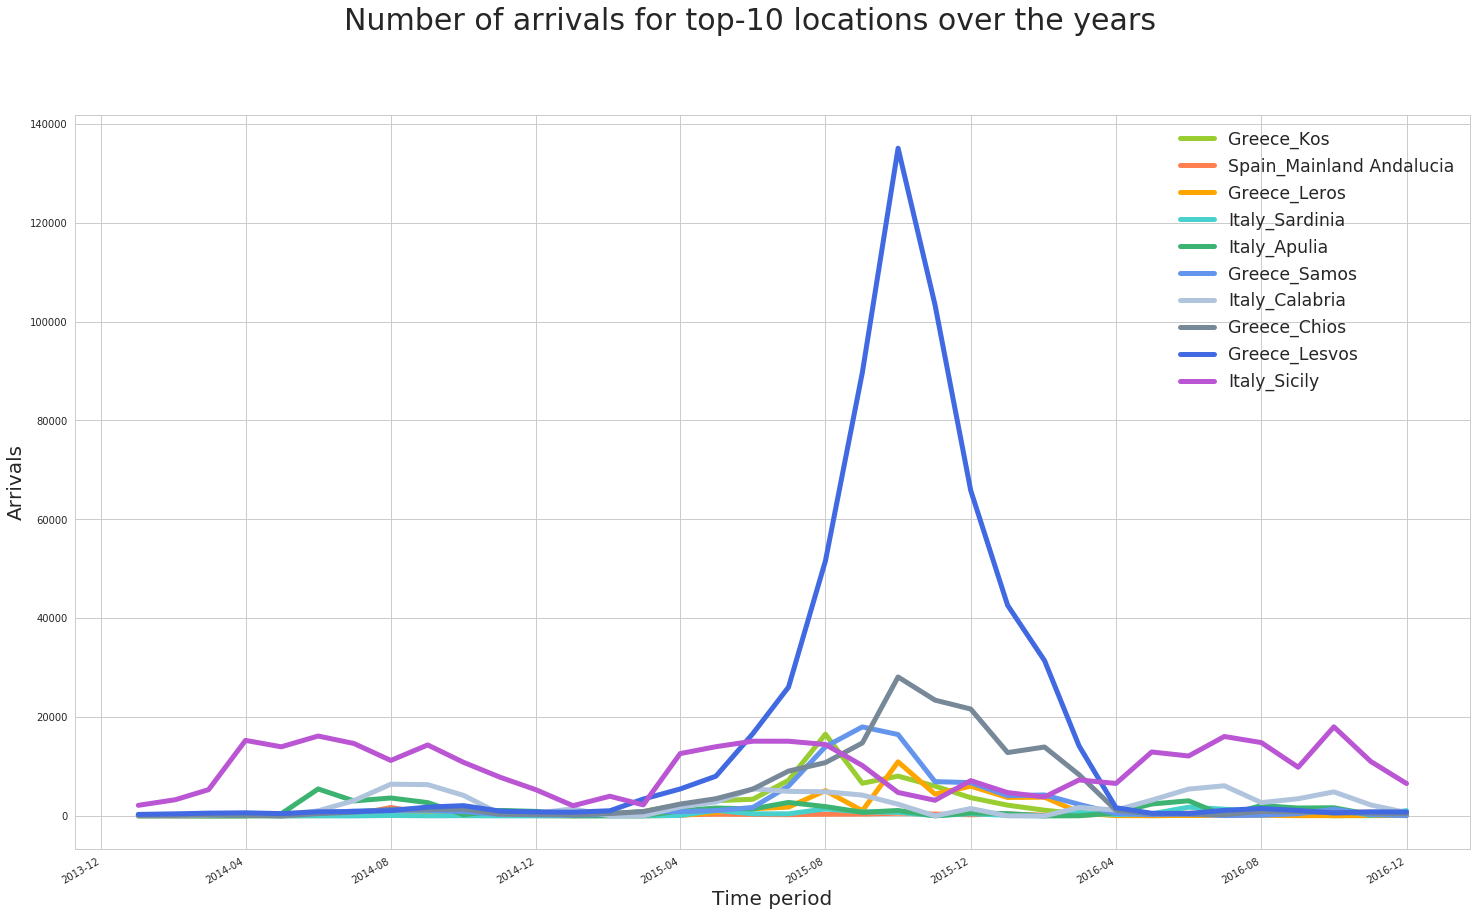

In [39]:
import itertools
colors = itertools.cycle(['#9ACD32','#FF7F50','#FFA500','#48D1CC','#3CB371','#6495ED','#B0C4DE','#778899','#4169E1','#BA55D3'])

fig = plt.figure(figsize=(25,15))
for i in top_10_locations:
    loc = i[0]
    plt.plot(new['period'].unique(), to_plot.loc[loc], label=loc, linewidth=5.0, color=next(colors))
plt.legend(fontsize='xx-large')

fig.suptitle('Number of arrivals for top-10 locations over the years', fontsize=30)
plt.xlabel('Time period', fontsize=20)
plt.ylabel('Arrivals', fontsize=20)

#make labels readable
fig.autofmt_xdate()

It's clear that Lesvos received by far the biggest number of refugees, especially in the period 8/2015 - 3/2016 where the arrivals exceeded **135.000** people (10/2015)

The next graph presents the same information but without showing the numbers for Lesvos, in an attempt to have a better view on the other top arrival locations.

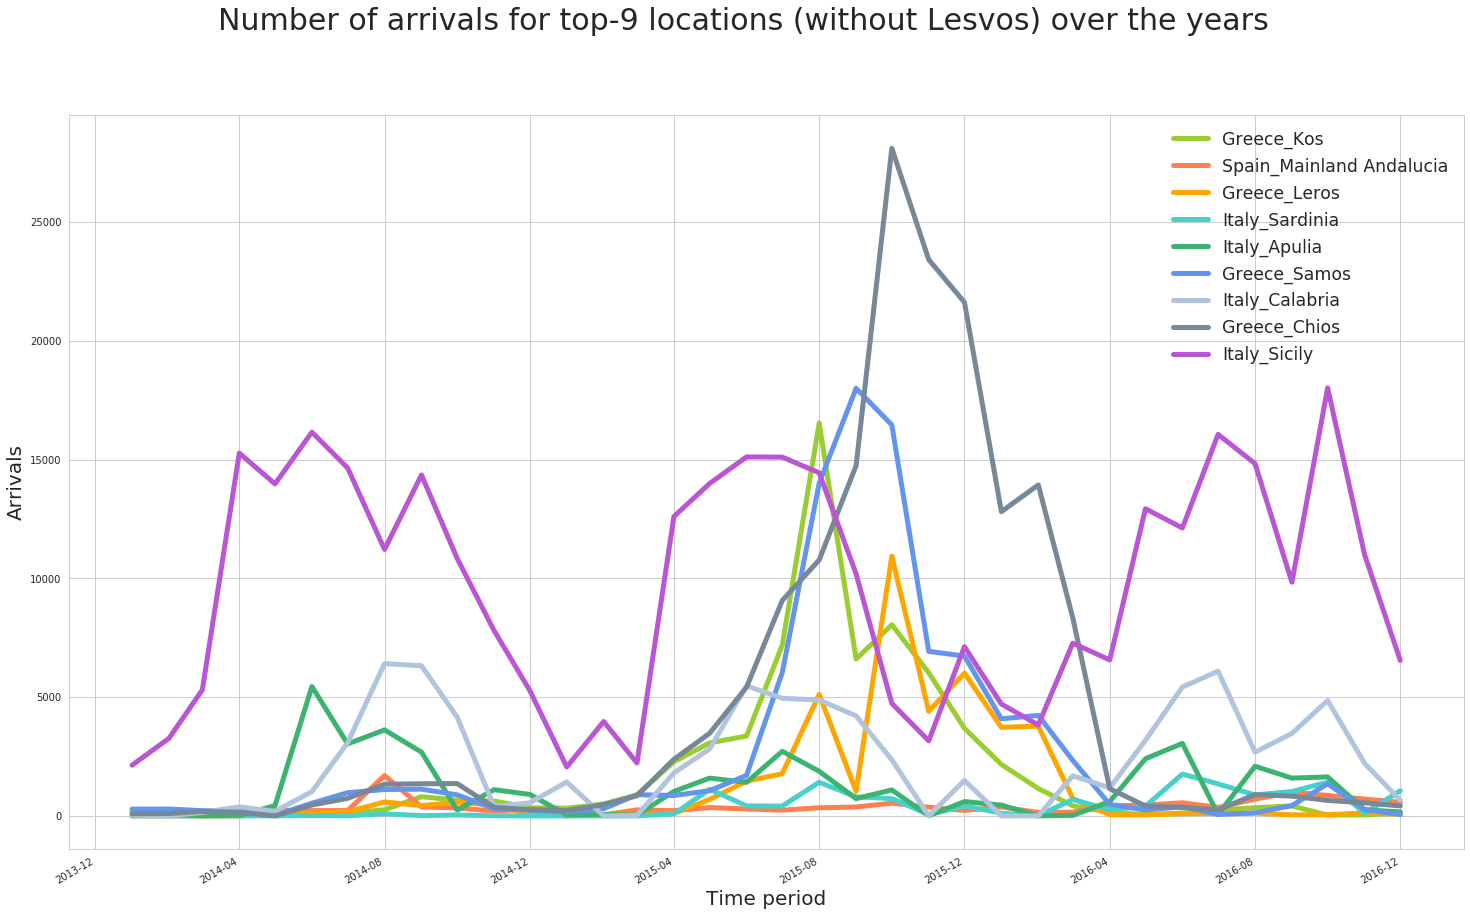

In [40]:
colors = itertools.cycle(['#9ACD32','#FF7F50','#FFA500','#48D1CC','#3CB371','#6495ED','#B0C4DE','#778899','#BA55D3'])

fig = plt.figure(figsize=(25,15))
for i in top_10_locations:
    loc = i[0]
    if 'Greece_Lesvos' in loc:
        continue
    plt.plot(new['period'].unique(), to_plot.loc[loc], label=loc, linewidth=5.0, color=next(colors))
plt.legend(fontsize='xx-large')

fig.suptitle('Number of arrivals for top-9 locations (without Lesvos) over the years', fontsize=30)
plt.xlabel('Time period', fontsize=20)
plt.ylabel('Arrivals', fontsize=20)

#make labels readable
fig.autofmt_xdate()

### Part 4

A lot has been said about the role of the various agencies providing humanitarian aid in crisis points around the world; it is not always easy to provide effective help, even with the best of intentions. 
Let's investigate who are the main actors providing aid in crises monitored by UNCHR. We will use the UNCHR API and make two tables:

   - The first table will show the number of organizations active in a country, for each country for which at least an organization is active.

In [41]:
# a list of active agencies by country

agencies_url = 'http://data.unhcr.org/api/whos_doing_what_where/countries.json'
json = requests.get(agencies_url).json()

In [42]:
total_agen = {}
if json:
    # we got some data
    for instance in json:
        for country in instance:
            if country['whos_doing_what_where']:
                # there are active agencies for this country
                # store the number
                if country['name'] in total_agen:
                    total_agen[country['name']] += len(country['whos_doing_what_where'])
                else:
                    total_agen[country['name']] = len(country['whos_doing_what_where'])

In [45]:
total_agen_sorted = sorted(total_agen.items(), key=lambda x:x[1], reverse=True)

In [46]:
x = PrettyTable()
x.field_names = ['Country','Number of agencies']
for i in total_agen_sorted:
    x.add_row([i[0],i[1]])
print(x)

+-------------------------+--------------------+
|         Country         | Number of agencies |
+-------------------------+--------------------+
|         Lebanon         |        302         |
|           Iraq          |        208         |
|         Ethiopia        |        169         |
|      Mali Situation     |        160         |
|          Jordan         |        148         |
|          Kenya          |        127         |
|       South Sudan       |         98         |
|    Nigeria Situation    |         73         |
| United Rep. of Tanzania |         69         |
|          Rwanda         |         48         |
|          Uganda         |         43         |
|         Somalia         |         39         |
|    Congo (Brazaville)   |         32         |
|         Burundi         |         25         |
|      Côte d'Ivoire      |         23         |
|          Egypt          |         20         |
|           Chad          |         15         |
|         Liberia   

   - The second table will show for each organization: the countries it is involved in and the projects it is involved in each country (perhaps some hierarchical indexing would come handy here).

In [47]:
if json:
    # we got some data
    df4 = pd.DataFrame(columns=['organization','country','project'])
    for instance in json:
        for country in instance:
            if country['whos_doing_what_where']:
                # there are active agencies for this country
                for agency in country['whos_doing_what_where']:
                    df4.loc[len(df4.index)] = pd.Series({'organization' : agency['organization_acronym'],
                                                         'country'      : country['name'],
                                                         'project'      : agency['sector_name_en']})

In [49]:
# remove any duplicate records from our dataframe
df4.drop_duplicates(inplace=True)
df4.head(5)

,organization,country,project
0,DRC,United Rep. of Tanzania,Camp Management
2,TWESA,United Rep. of Tanzania,Camp Management
3,IRC,United Rep. of Tanzania,Child Protection
4,Plan Intl,United Rep. of Tanzania,Child Protection
5,SCI,United Rep. of Tanzania,Child Protection


In [50]:
df4.shape[0]

1556

We got **1556 projects** in our dataset

In [51]:
# make all columns visible
pd.set_option('display.max_columns', 361)

In the following table we can see all organizations acting in each country. It's a long list :)

In [52]:
pdf4 = pd.pivot_table(df4,index=['organization'],columns=['country'],values=['project'], aggfunc=lambda s: ', '.join(s))
pdf4

project  \
country                                                        Burundi   
organization                                                             
AAEDC - Cameroun                                                  None   
AAH-I                                                             None   
AAR Japan                                                         None   
AARREC                                                            None   
ABAAD Lebanon                                                     None   
ACEEN – Cameroun                                                  None   
ACF                                                               None   
ACF-E                                                             None   
ACRA                                                              None   
ACROSS                                                            None   
ACTED                                                             None   
ADEO                                                              None   
ADES Chad                                                         None   
ADICOR                                                            None   
ADKOUL                                                            None   
ADRA                                                              None   
AEC                                                               None   
AEEG                                                              None   
AHA                                                               None   
AHADA                                                             None   
AIC                                                               None   
AIRD                                                              None   
AJEM Lebanon                                                      None   
ALDEPA – Cameroun                                                 None   
ALPD                                                              None   
ALVF – Cameroun                                                   None   
AMPF                                                              None   
AMREF                                                             None   
AMURT                                                             None   
APBE                                                              None   
...                                                                ...   
UNFPA                                                             None   
UNHABITAT                                                         None   
UNHAS                                                             None   
UNHCR                Child Protection, Community Services, Educatio...   
UNHCR Ethiopia                                                    None   
UNHCR Kenya                                                       None   
UNICEF                                                            None   
UNOPS                                                             None   
UNRWA                                                             None   
UNV                                                               None   
UNWOMEN                                                           None   
UPP                                                               None   
URDA Lebanon                                                      None   
VSF                                                               None   
WAHA                                                              None   
WCH                                                               None   
WFP                                                               Food   
WHO                                                               None   
WLAC                                                              None   
WRF                                                               None   
WRO                                                               N


Since we are more instersted in the organizations rather than the countries, the next pivot table is more readable

In [53]:
pdf4 = pd.pivot_table(df4,columns=['organization'],index=['country'],values=['project'], aggfunc=lambda s: ', '.join(s))
pdf4

project  \
organization               AAEDC - Cameroun   
country                                       
Burundi                                None   
Chad                                   None   
Congo (Brazaville)                     None   
Côte d'Ivoire                          None   
Djibouti                               None   
Egypt                                  None   
Ethiopia                               None   
Iraq                                   None   
Jordan                                 None   
Kenya                                  None   
Lebanon                                None   
Liberia                                None   
Mali Situation                         None   
Nigeria Situation        Water & Sanitation   
Rwanda                                 None   
Somalia                                None   
South Sudan                            None   
Thailand-Myanmar                       None   
Turkey                                 None   
Uganda                                 None   
United Rep. of Tanzania                None   

                                                                       \
organization                                         AAH-I  AAR Japan   
country                                                                 
Burundi                                               None       None   
Chad                                                  None       None   
Congo (Brazaville)                                    None       None   
Côte d'Ivoire                                         None       None   
Djibouti                                              None       None   
Egypt                                                 None       None   
Ethiopia                                              None       None   
Iraq                                                  None       None   
Jordan                                                None       None   
Kenya                                Education, Livelihood  Education   
Lebanon                                               None       None   
Liberia                                               None       None   
Mali Situation                                        None       None   
Nigeria Situation                                     None       None   
Rwanda                                                None       None   
Somalia                  Livelihood, Logistics, Protection       None   
South Sudan                                           None       None   
Thailand-Myanmar                                      None       None   
Turkey                                                None       None   
Uganda                                                None       None   
United Rep. of Tanzania                               None       None   

                                                                            \
organization                                                        AARREC   
country                                                                      
Burundi                                                               None   
Chad                                                                  None   
Congo (Brazaville)       Agriculture, Camp Management, Child Protection...   
Côte d'Ivoire                                                         None   
Djibouti                                                              None   
Egypt                                                                 None   
Ethiopia                                                              None   
Iraq                                                                  None   
Jordan                                                                None   
Kenya                                                                 None   
Lebanon                                                               None   
Liberia                                                       

The above table contains all necessary information but it's also quite sparse and thus not so user-friendly.
We will try to display the data using another technique:

In [54]:
# We will create a MultiIndex for our data, based on pandas documentation page
# https://pandas.pydata.org/pandas-docs/stable/advanced.html

arrays = [df4['organization'].tolist(),df4['country'].tolist()]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['organization','country' ])
s = pd.Series(df4['project'].tolist(), index=index)
table_sorted = s.sort_index()

In [55]:
table_sorted.head(30)

organization      country           
AAEDC - Cameroun  Nigeria Situation           Water & Sanitation
AAH-I             Kenya                                Education
                  Kenya                               Livelihood
                  Somalia                             Livelihood
                  Somalia                              Logistics
                  Somalia                             Protection
AAR Japan         Kenya                                Education
AARREC            Congo (Brazaville)                 Agriculture
                  Congo (Brazaville)             Camp Management
                  Congo (Brazaville)            Child Protection
                  Congo (Brazaville)          Community Services
                  Congo (Brazaville)                   Education
                  Congo (Brazaville)       Gender-Based Violence
                  Congo (Brazaville)                  Livelihood
                  Congo (Brazaville)                 

### Part 5

How do political institutions affect growth in a country? The refugee crisis is the ultimate failure in political institutions. Yet, even when political institutions do not collapse completely, differences in political institutions among countries can result in different prospects for the people living in it.

Here we will explore the relationship between political institutions and growth.

Lets's download the Database of Political Institutions 2015 (DPI2015) dataset, which contains a wealth of details for political institutions in different countries around the world over the years. 

In [56]:
import zipfile as zf
import os
from requests import get  # to make GET request

In [57]:
def download(url, file_name):
    # open in binary mode
    with open(file_name, "wb") as file:
        # get request
        response = get(url)
        # write to file
        file.write(response.content)

url = 'http://www.iadb.org/document.cfm?pubDetail=1&id=40094628'
file_name = 'institutions.zip'
download(url,file_name)

In [58]:
# extract downloaded zip archive
with zf.ZipFile('institutions.zip', 'r') as myzip:
    myzip.extractall()

In [59]:
file = 'DPI2015/DPI2015_basefile.v5.xlsx'
institutions = pd.read_excel(file)
institutions.drop_duplicates(inplace=True)
institutions.head(3)

,countryname,ifs,year,system,yrsoffc,finittrm,yrcurnt,multpl,military,defmin,percent1,percentl,prtyin,execme,execrlc,execnat,execrurl,execreg,execrel,execage,allhouse,nonchief,totalseats,gov1me,gov1seat,gov1vote,gov1rlc,gov1nat,gov1rurl,gov1reg,gov1rel,gov1age,gov2me,gov2seat,gov2vote,gov2rlc,gov2nat,gov2rurl,gov2reg,gov2rel,gov2age,gov3me,gov3seat,gov3vote,gov3rlc,gov3nat,gov3rurl,gov3reg,gov3rel,gov3age,govoth,govothst,govothvt,opp1me,opp1seat,opp1vote,opp1rlc,opp1nat,opp1rurl,opp1reg,opp1rel,opp1age,opp2me,opp2seat,opp2vote,opp3me,opp3seat,opp3vote,oppoth,oppothst,oppothvt,ulprty,numul,ulvote,oppmajh,oppmajs,dateleg,dateexec,legelec,exelec,liec,eiec,mdmh,mdms,ssh,pluralty,pr,housesys,sensys,thresh,dhondt,cl,select,fraud,auton,muni,state,author,stconst,gwno
0,Turk Cyprus,0,1975,-999.0,1.0,-999.0,-999.0,-999.0,NaN,NaN,NaN,NaN,-999.0,independent,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,0,NaN,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,NaN,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,0.0,0.0,NaN,0.0,0.0,-999.0,0.0,0.0,-999.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,-999.0,-999.0,NaN,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,2.0,-999.0,-999.0,-999.0,NaN,NaN,NaN,NaN,-999.0,NaN,NaN
1,Turk Cyprus,0,1976,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,-999.0,independent,0.0,1.0,0.0,0.0,0.0,NaN,1.0,-999,0,NaN,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,NaN,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,0.0,0.0,NaN,0.0,0.0,-999.0,0.0,0.0,-999.0,0.0,0.0,0.0,-999.0,-999.0,6.0,0.0,1.0,1.0,2.0,NaN,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,2.0,-999.0,-999.0,-999.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,Turk Cyprus,0,1977,0.0,2.0,1.0,4.0,1.0,NaN,NaN,NaN,NaN,-999.0,independent,1.0,1.0,0.0,0.0,0.0,NaN,1.0,-999,40,UBP,29.0,NaN,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,TKP,6.0,NaN,3.0,NaN,0.0,0.0,0.0,NaN,CTP,2.0,NaN,HP,2.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,0.0,0.0,7.0,6.5,NaN,NaN,NaN,NaN,NaN,-999.0,-999.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


Now we will download the annual GDP percentage growth data compiled by the World Bank.

In [60]:
#path_to_file = 'API_NY.GDP.MKTP.KD.ZG_DS2_en_excel_v2.xls'
url = 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.KD.ZG?downloadformat=excel'
file_name = 'growth.xls'
download(url,file_name)
growth = pd.read_excel(url, skiprows=3, header=0)
growth.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.245086,7.814432,6.666622,1.154469,4.514062,-0.364696,-2.164459,0.465290,7.519472,1.176690,0.380391,2.355119,-3.654626,-6.881302,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.444163,1.055556,11.175270,5.554138,13.740205,3.611368,21.020649,8.433290,6.113685,14.434741,1.959123,1.312531,1.112558,2.232272
2,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,7.9,5.6,0.4,-0.3,-1.2,-6.9,-24.7,3.5,10.400000,11.200000,7.900000,6.804762,3.239800,3.012076,4.220965,-6.940462,5.247495,10.879577,18.261450,20.735125,22.593054,13.817146,2.412870,3.407655,3.918597,5.155441,6.813586,4.804473,3.006981,0.000000


In [61]:
# Indicator Name and Indicator Code are common for all records
growth.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
growth.head(3)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.245086,7.814432,6.666622,1.154469,4.514062,-0.364696,-2.164459,0.465290,7.519472,1.176690,0.380391,2.355119,-3.654626,-6.881302,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.444163,1.055556,11.175270,5.554138,13.740205,3.611368,21.020649,8.433290,6.113685,14.434741,1.959123,1.312531,1.112558,2.232272
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,7.9,5.6,0.4,-0.3,-1.2,-6.9,-24.7,3.5,10.400000,11.200000,7.900000,6.804762,3.239800,3.012076,4.220965,-6.940462,5.247495,10.879577,18.261450,20.735125,22.593054,13.817146,2.412870,3.407655,3.918597,5.155441,6.813586,4.804473,3.006981,0.000000


This dataset contains information for the annual percentage growth rate of GDP at market prices based on constant local currency. 
Aggregates are based on constant 2010 U.S. dollars. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.


We may now use the available datasets in order to create a model that predicts for a country, with a given set of institutions, its average growth rate.

In [ ]:
#